In [1]:
import pandas as pd
import os

def load_sensor_csv(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
        
        # Extract relevant data
        data_lines = lines[3:]  # Skip first 3 lines
        columns = data_lines[0].strip().split(',')  # Column names are on 4th row
        data = data_lines[2:]  # Skip 5th row (units) and keep data from 6th row onwards

        # Parse rows into a DataFrame
        data_rows = []
        for line in data:
            row = line.strip().split(',')
            row = row[:len(columns)]  # Ensure row length matches column count
            data_rows.append(row)

        df = pd.DataFrame(data_rows, columns=columns)
        df = df.apply(pd.to_numeric, errors='coerce')  # Convert everything to numeric

        return df
    except Exception:
        return None

def get_non_zero_column_indices(df):
    """
    Identifies indices of columns that are **not** fully zero in the first 5 rows.
    Returns a set of indices to keep.
    """
    non_zero_indices = {
        idx for idx in range(df.shape[1]) if not (df.iloc[:5, idx].notna().all() and (df.iloc[:5, idx] == 0).all())
    }
    return non_zero_indices

def filter_and_save_csv(file_path):
    df = load_sensor_csv(file_path)
    
    if df is not None:
        non_zero_indices = get_non_zero_column_indices(df)
        filtered_df = df.iloc[:, sorted(non_zero_indices)]  # Keep only non-zero columns
        
        # Overwrite original file with filtered content
        filtered_df.to_csv(file_path, index=False)
        print(f"Overwritten CSV with filtered data: {file_path}")

def process_subjects(subjects, base_path):
    for subject in subjects:
        subject_folder = f"P{str(subject).zfill(2)}"
        sensor_folder = os.path.join(base_path, subject_folder, "raw_sensor")

        if not os.path.exists(sensor_folder):
            continue

        csv_files = [f for f in os.listdir(sensor_folder) if f.endswith('.csv')]
        for csv_file in csv_files:
            file_path = os.path.join(sensor_folder, csv_file)
            filter_and_save_csv(file_path)

# List of subjects and base directory
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
base_path = "g:/My Drive/sd_datacollection_v4/"

process_subjects(subjects, base_path)


C:\Users\saile\AppData\Local\Temp\ipykernel_30676\3325842992.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_EF_F.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_EF_N.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_EF_S.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_ER_F.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_ER_N.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_ER_S.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_OR_M.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_AS_F.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_AS_N.csv
Overwritten CSV with filtered data: g:/My Drive/sd_datacollection_v4/P01\raw_sensor\P01_T1_AS_S.csv


In [23]:
import pandas as pd
import os

def load_column_names(file_path):
    try:
        with open(file_path, 'r') as file:
            for i, line in enumerate(file):
                if i == 3:
                    columns = line.strip().split(',')
                elif i == 4:
                    units = line.strip().split(',')
                elif i == 5:
                    first_line = line.strip().split(',')
                    break  # Stop reading after getting necessary lines

        # Keep only indices where the first line is not '0'
        non_zero_indices = [idx for idx in range(len(first_line)) if first_line[idx] != '0']
        filtered_columns = [columns[idx] for idx in non_zero_indices]
        filtered_units = [units[idx] for idx in non_zero_indices]
        filtered_first_line = [first_line[idx] for idx in non_zero_indices]

        return filtered_columns
    except Exception:
        return None

def get_all_column_names(subjects, base_path):
    all_columns_info = {}

    for subject in subjects:
        subject_folder = f"P{str(subject).zfill(2)}"
        sensor_folder = os.path.join(base_path, subject_folder, "raw_sensor")

        if not os.path.exists(sensor_folder):
            continue

        csv_files = [f for f in os.listdir(sensor_folder) if f.endswith('.csv')]
        for csv_file in csv_files:
            file_path = os.path.join(sensor_folder, csv_file)
            columns = load_column_names(file_path)

            if columns is not None:
                subject_key = f"Subject_{subject}"
                if subject_key not in all_columns_info:
                    all_columns_info[subject_key] = {}
                all_columns_info[subject_key][csv_file] = columns

    return all_columns_info

# List of subjects and base directory
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
base_path = "g:/My Drive/sd_datacollection_v4/"

# Get column names
column_info = get_all_column_names(subjects, base_path)





In [24]:
print(column_info)

{'Subject_1': {'P01_T1_EF_F.csv': ['Frame', '1', 'IM EMG1', 'IM EMG2', 'IM EMG3', 'IM EMG4', 'IM EMG5', 'IM EMG6', 'IM EMG7', 'IM EMG8', 'ACCX1', 'ACCY1', 'ACCZ1', 'GYROX1', 'GYROY1', 'GYROZ1', 'ACCX2', 'ACCY2', 'ACCZ2', 'GYROX2', 'GYROY2', 'GYROZ2', 'ACCX3', 'ACCY3', 'ACCZ3', 'GYROX3', 'GYROY3', 'GYROZ3', 'ACCX4', 'ACCY4', 'ACCZ4', 'GYROX4', 'GYROY4', 'GYROZ4', 'ACCX5', 'ACCY5', 'ACCZ5', 'GYROX5', 'GYROY5', 'GYROZ5', 'ACCX6', 'ACCY6', 'ACCZ6', 'GYROX6', 'GYROY6', 'GYROZ6', 'ACCX7', 'ACCY7', 'ACCZ7', 'GYROX7', 'GYROY7', 'GYROZ7', 'ACCX8', 'ACCY8', 'ACCZ8', 'GYROX8', 'GYROY8', 'GYROZ8'], 'P01_T1_EF_N.csv': ['Frame', '1', 'IM EMG1', 'IM EMG2', 'IM EMG3', 'IM EMG4', 'IM EMG5', 'IM EMG6', 'IM EMG7', 'IM EMG8', 'ACCX1', 'ACCY1', 'ACCZ1', 'GYROX1', 'GYROY1', 'GYROZ1', 'ACCX2', 'ACCY2', 'ACCZ2', 'GYROX2', 'GYROY2', 'GYROZ2', 'ACCX3', 'ACCY3', 'ACCZ3', 'GYROX3', 'GYROY3', 'GYROZ3', 'ACCX4', 'ACCY4', 'ACCZ4', 'GYROX4', 'GYROY4', 'GYROZ4', 'ACCX5', 'ACCY5', 'ACCZ5', 'GYROX5', 'GYROY5', 'GYROZ5',

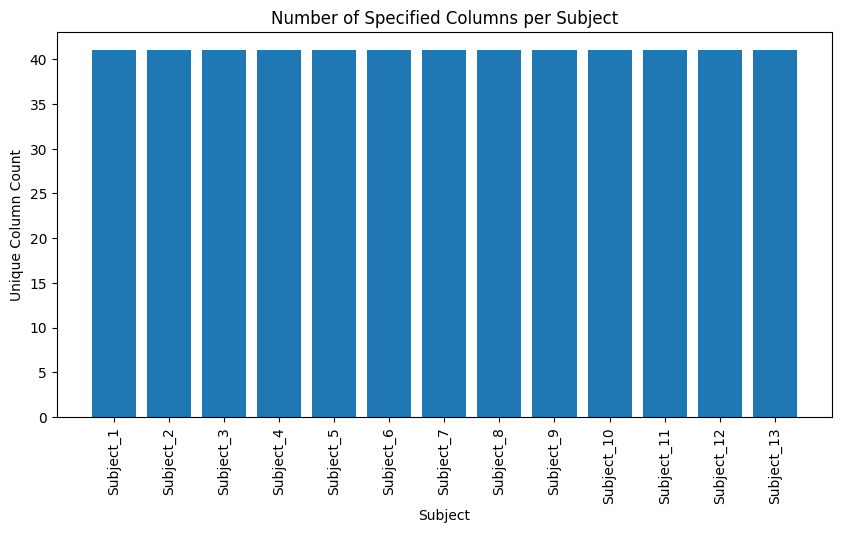

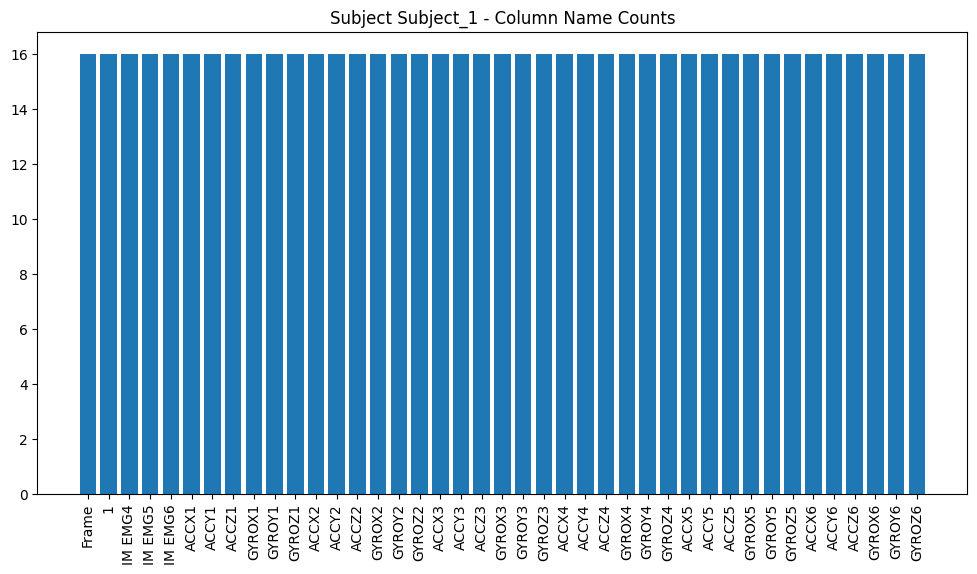

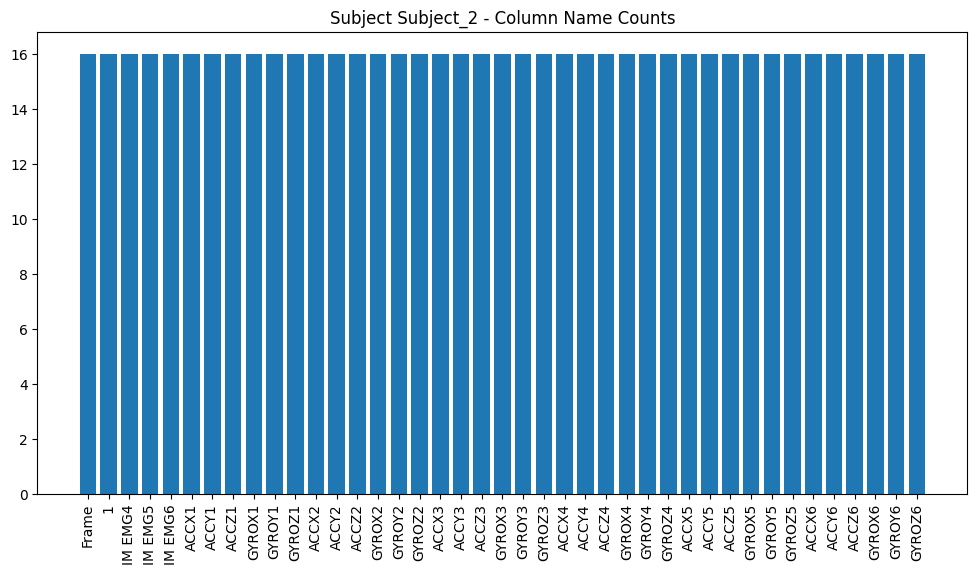

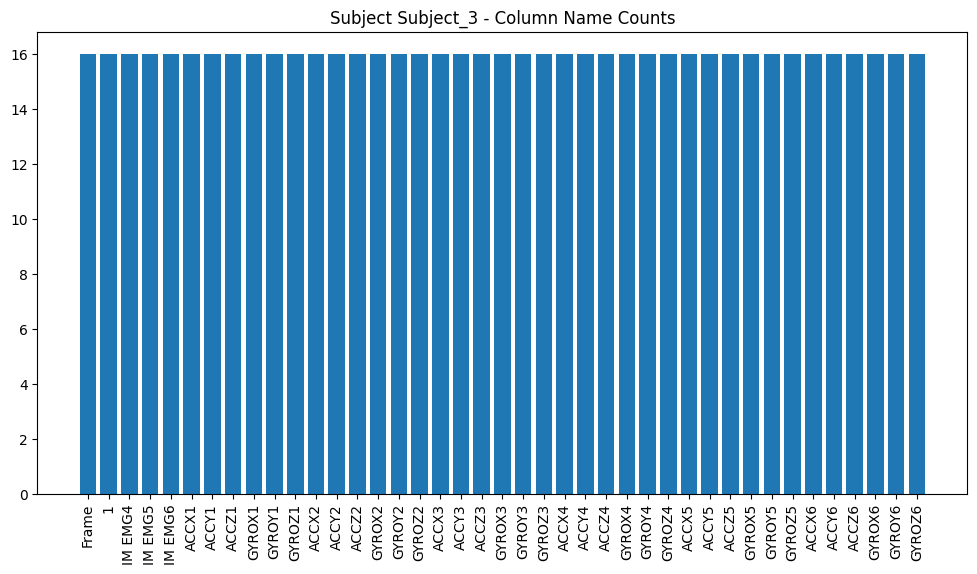

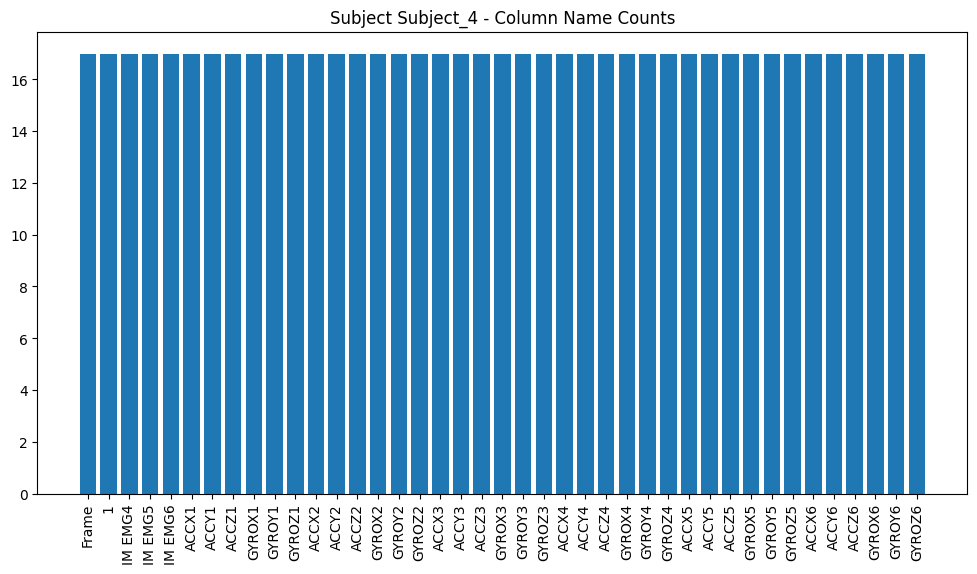

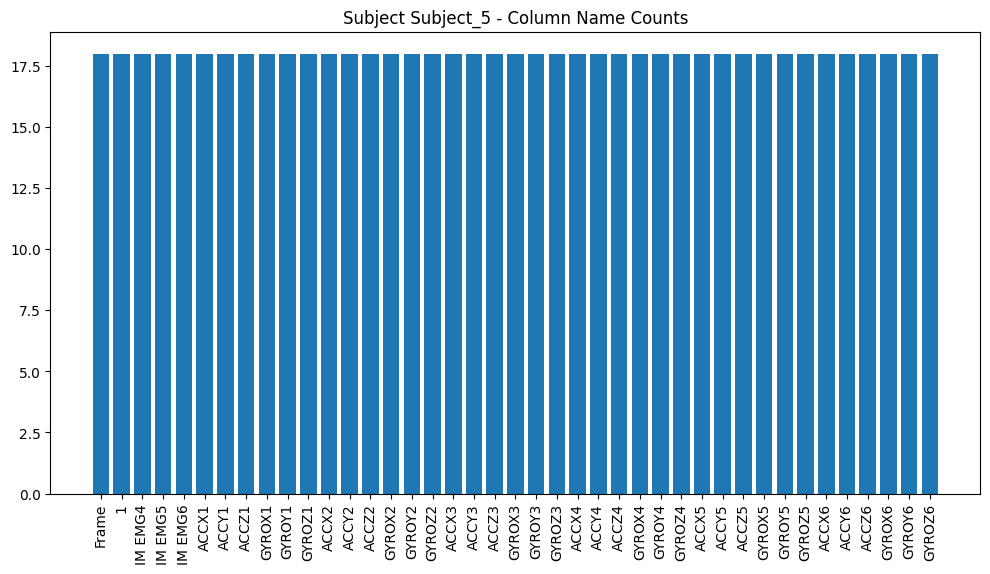

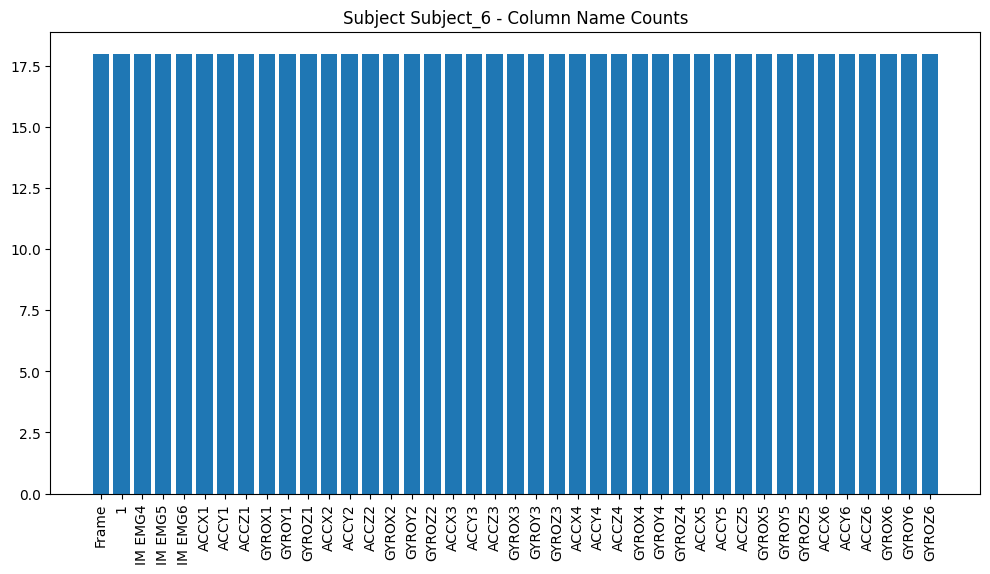

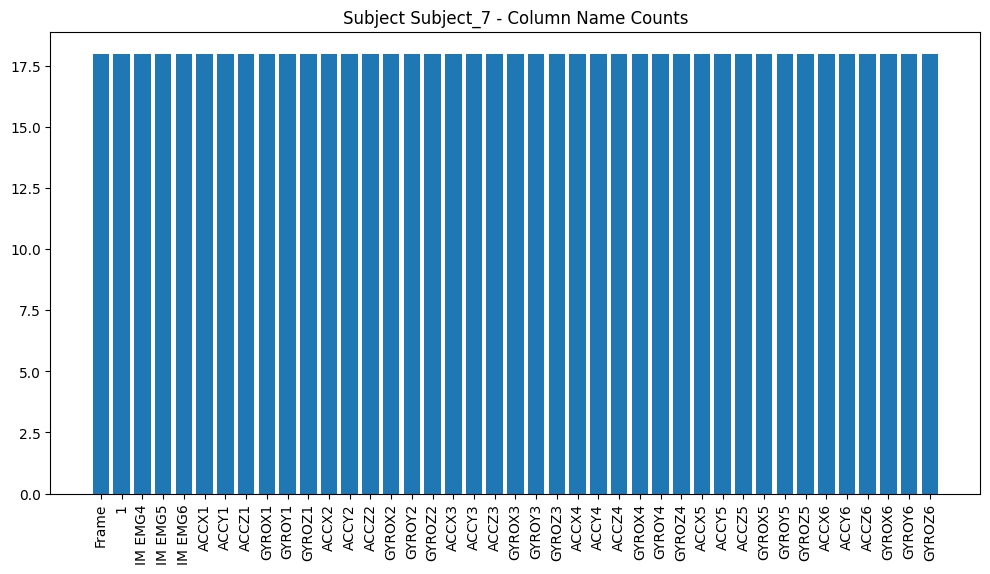

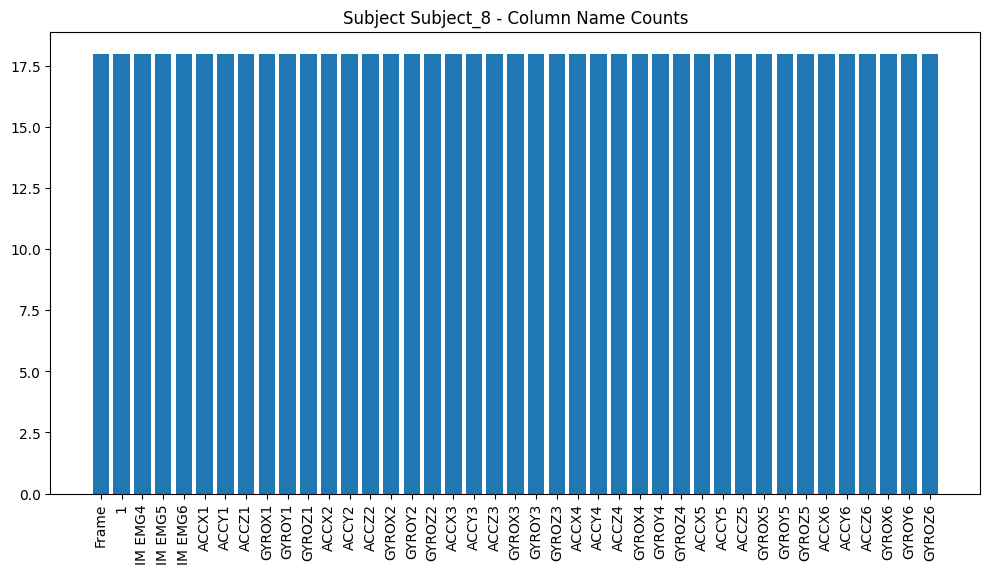

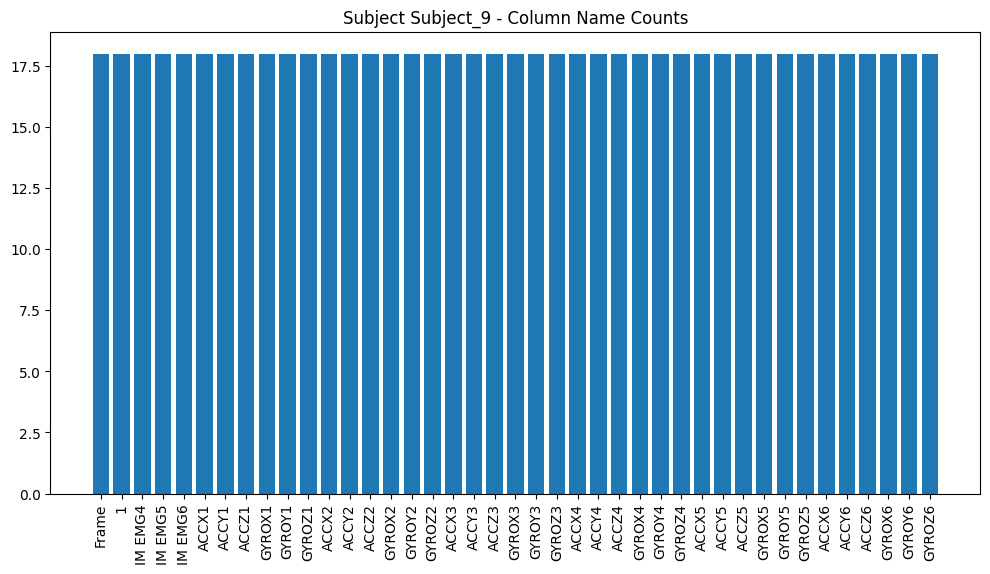

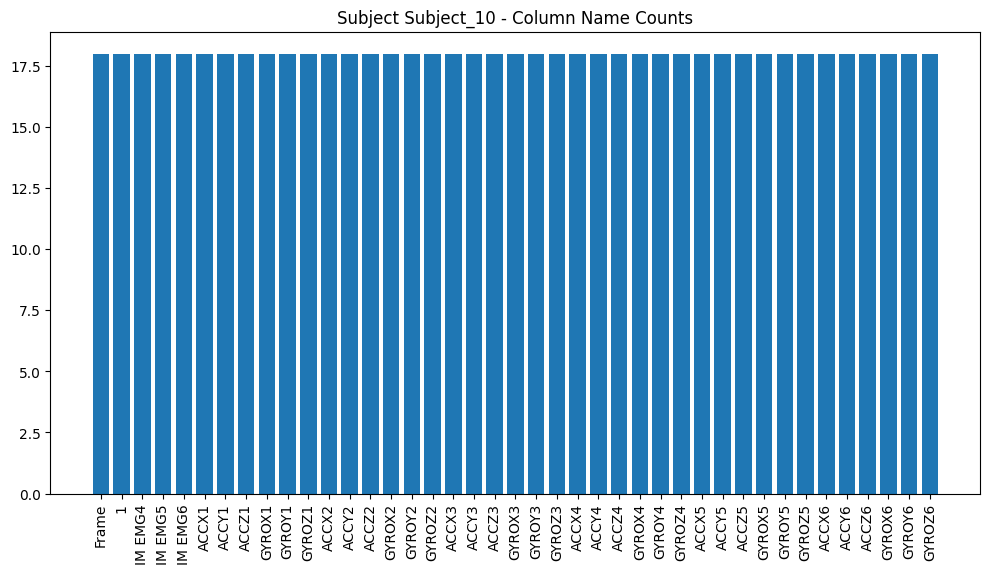

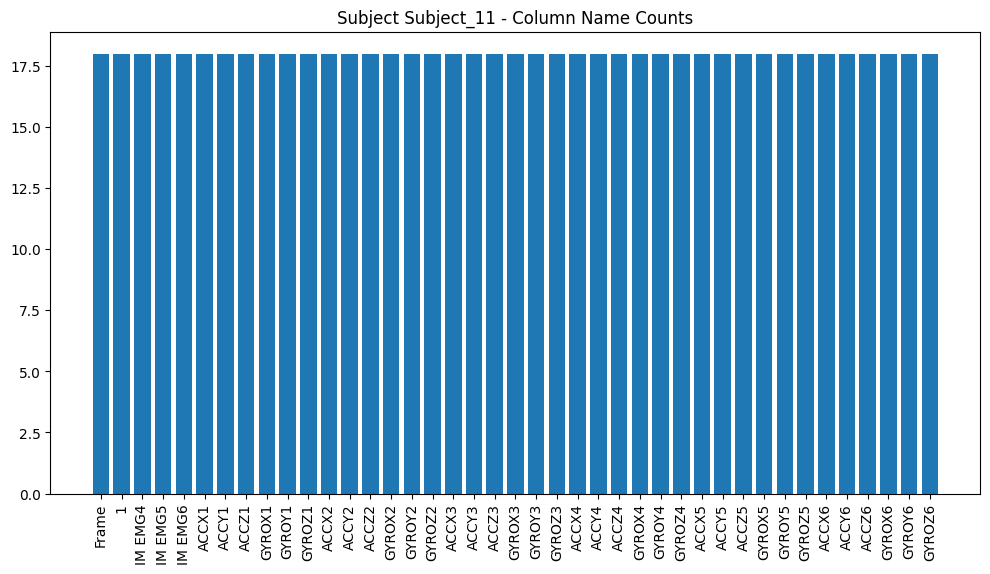

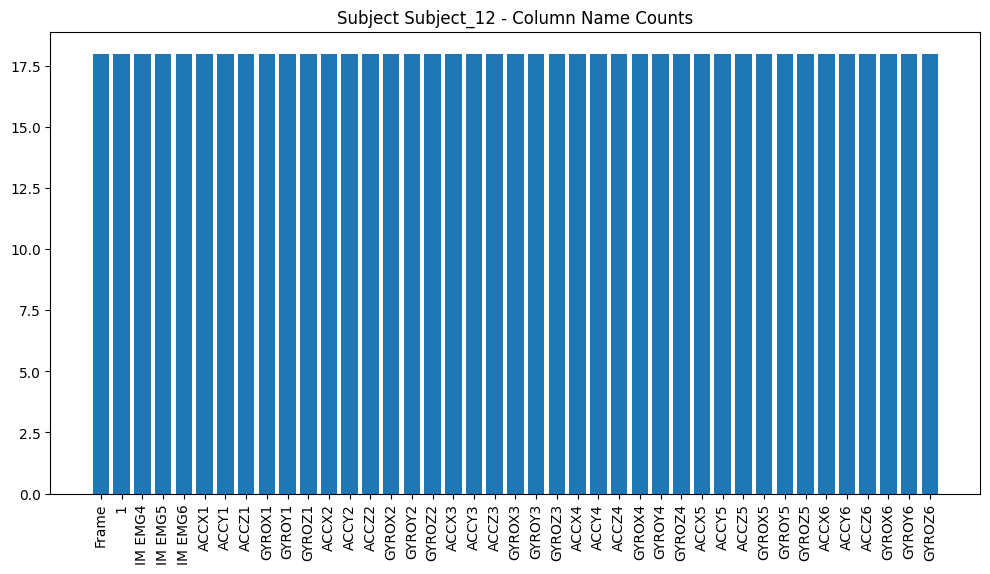

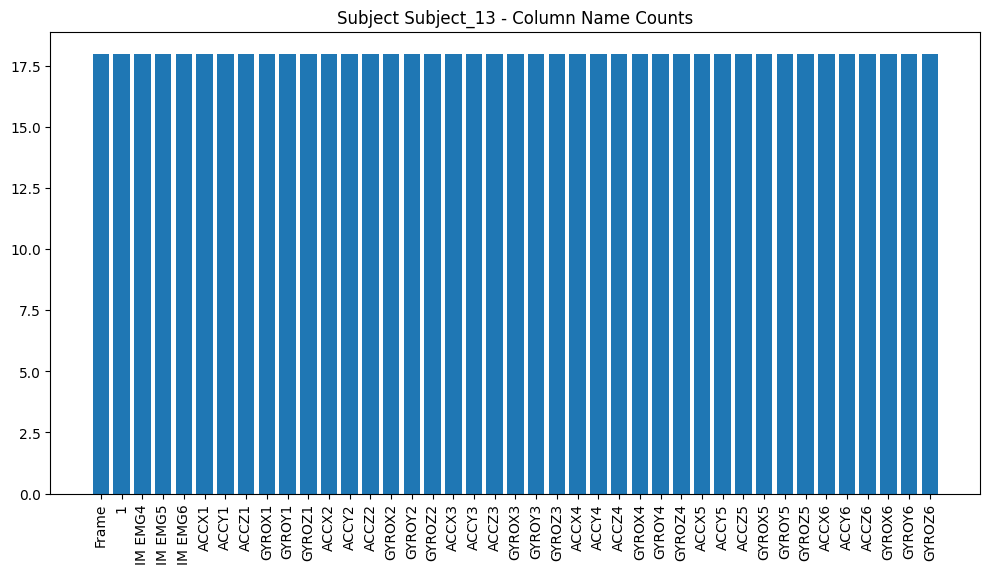

In [31]:
#print total occurences of each column name
from collections import Counter

subject_column_counts = {}

for subject, files in column_info.items():
    subject_counts = Counter()

    for file_name, columns in files.items():
        subject_counts.update(columns)

    subject_column_counts[subject] = subject_counts


from collections import Counter
import matplotlib.pyplot as plt

# Define columns to keep
columns_to_keep = {'IM EMG4', 'IM EMG5', 'IM EMG6','Frame', '1',  'ACCX1', 'ACCY1', 'ACCZ1', 'GYROX1', 'GYROY1', 'GYROZ1', 'ACCX2', 'ACCY2', 'ACCZ2', 'GYROX2', 'GYROY2', 'GYROZ2', 'ACCX3', 'ACCY3', 'ACCZ3', 'GYROX3', 'GYROY3', 'GYROZ3', 'ACCX4', 'ACCY4', 'ACCZ4', 'GYROX4', 'GYROY4', 'GYROZ4', 'ACCX5', 'ACCY5', 'ACCZ5', 'GYROX5', 'GYROY5', 'GYROZ5', 'ACCX6', 'ACCY6', 'ACCZ6', 'GYROX6', 'GYROY6', 'GYROZ6'}

# Filter column counts by keeping only specified columns
filtered_subject_column_counts = {}

for subject, counts in subject_column_counts.items():
    filtered_counts = {col: count for col, count in counts.items() if col in columns_to_keep}
    filtered_subject_column_counts[subject] = filtered_counts

# Plot the number of unique columns per subject
subject_column_counts_summary = {subject: len(counts) for subject, counts in filtered_subject_column_counts.items()}

plt.figure(figsize=(10, 5))
plt.bar(subject_column_counts_summary.keys(), subject_column_counts_summary.values())
plt.xlabel("Subject")
plt.ylabel("Unique Column Count")
plt.title("Number of Specified Columns per Subject")
plt.xticks(rotation=90)
plt.show()

# Plot counts for each subject
for subject, counts in filtered_subject_column_counts.items():
    if counts:  # Only plot if there are columns to display
        plt.figure(figsize=(12, 6))
        plt.bar(counts.keys(), counts.values())
        plt.title(f"Subject {subject} - Column Name Counts")
        plt.xticks(rotation=90)
        plt.show()

    


In [44]:
columns_to_keep = {'IM EMG4', 'IM EMG5', 'IM EMG6', 'Frame', 'Sub Frame',  
                   'ACCX1', 'ACCY1', 'ACCZ1', 'GYROX1', 'GYROY1', 'GYROZ1', 
                   'ACCX2', 'ACCY2', 'ACCZ2', 'GYROX2', 'GYROY2', 'GYROZ2', 
                   'ACCX3', 'ACCY3', 'ACCZ3', 'GYROX3', 'GYROY3', 'GYROZ3', 
                   'ACCX4', 'ACCY4', 'ACCZ4', 'GYROX4', 'GYROY4', 'GYROZ4', 
                   'ACCX5', 'ACCY5', 'ACCZ5', 'GYROX5', 'GYROY5', 'GYROZ5', 
                   'ACCX6', 'ACCY6', 'ACCZ6', 'GYROX6', 'GYROY6', 'GYROZ6'}

def load_column_names(file_path):
    try:
        with open(file_path, 'r') as file:
            for i, line in enumerate(file):
                if i == 3:
                    columns = line.strip().split(',')
                elif i == 4:
                    units = line.strip().split(',')
                elif i == 5:
                    first_line = line.strip().split(',')
                    break  # Stop reading after getting necessary lines

        # Keep only indices where the first line is not '0'
        non_zero_indices = [idx for idx in range(len(first_line)) if first_line[idx] != '0' or columns[idx] in ["Frame","Sub Frame"] ]
        filtered_columns = [columns[idx] for idx in non_zero_indices]

        return filtered_columns, non_zero_indices
    except Exception:
        return None, None

def process_csv_files(subjects, base_path):
    for subject in subjects:
        subject_folder = f"P{str(subject).zfill(2)}"
        sensor_folder = os.path.join(base_path, subject_folder, "raw_sensor")
        processed_folder = os.path.join(base_path, subject_folder, "processed_sensor")

        print(f"Processing {subject_folder}...")

        if not os.path.exists(sensor_folder):
            continue

        # Create processed directory if it doesn't exist
        os.makedirs(processed_folder, exist_ok=True)

        csv_files = [f for f in os.listdir(sensor_folder) if f.endswith('.csv')]
        for csv_file in csv_files:
            file_path = os.path.join(sensor_folder, csv_file)
            processed_file_path = os.path.join(processed_folder, csv_file)

            # Get relevant column names and indices
            column_names, valid_indices = load_column_names(file_path)
            if column_names is None or valid_indices is None:
                continue

            # Read the CSV, skipping first 5 lines to align with the dataset structure
            df = pd.read_csv(file_path, skiprows=5, header=None)

            # Retain only valid columns based on non-zero indices
            df = df.iloc[:, valid_indices]
            df.columns = column_names  # Assign extracted column names

            # Filter to keep only the necessary columns
            df_filtered = df[[col for col in column_names if col in columns_to_keep]]

            # Save the filtered DataFrame to the processed folder
            df_filtered.to_csv(processed_file_path, index=False)

print("Processing CSV files...")
print("Subjects", subjects[11:])
print("Base Path", base_path)
process_csv_files(subjects[11:], base_path)

Processing CSV files...
Subjects [12, 13]
Base Path g:/My Drive/sd_datacollection_v4/
Processing P12...
Processing P13...


In [61]:
import os
import shutil
import pandas as pd
import time

# Define movement and speed mappings
movement_map = {
    "AS": "ArmSwing",
    "CB": "CrossbodyReach",
    "EF": "ElbowFlexion",
    "ER": "ShoulderRotation",  # Convert ER to SR
    "SR": "ShoulderRotation",
    "OR": "OverheadReach"
}

speed_map = {
    "F": "Fast",
    "N": "Normal",
    "S": "Slow",
    "M": "Max",
    "VF": "VeryFast",
    "180": "180",
    "90": "90"
}

# Define source and destination base directories
source_base = r'G:\My Drive\sd_datacollection_v4'
destination_base = r'G:\My Drive\sd_datacollection_v5'

# Function to safely read CSV with retry (Google Drive sync issue mitigation)
def safe_read_csv(file_path, retries=10, delay=5):
    for attempt in range(retries):
        try:
            return pd.read_csv(file_path, encoding="utf-8")
        except OSError as e:
            print(f"Error reading {file_path} (attempt {attempt+1}): {e}")
            time.sleep(delay)
    print(f"Failed to read {file_path} after {retries} attempts.")
    return None

# Function to get all file paths for a given directory
def get_all_file_paths(directory):
    file_data = []
    for root, _, files in os.walk(directory):
        for file in files:
            relative_path = os.path.relpath(os.path.join(root, file), directory)
            path_parts = relative_path.split(os.sep)  
            file_name_parts = file.rsplit('.', 1)  
            name_parts = file_name_parts[0].split('_')  
            extension = file_name_parts[1] if len(file_name_parts) > 1 else ""

            file_data.append({
                "relative_path": relative_path,
                "path_parts": path_parts,
                "file_name_parts": name_parts,
                "extension": extension
            })
    return file_data

# Iterate over subjects P01 - P13
for subject_id in range(1, 14):
    subject = f"P{subject_id:02d}"
    source_dir = os.path.join(source_base, subject)
    destination_dir = os.path.join(destination_base, subject)

    if not os.path.exists(source_dir):
        print(f"Skipping {subject}, source directory does not exist.")
        continue

    print(f"Processing {subject}...")

    # Get all files for this subject
    files = get_all_file_paths(source_dir)

    # Process each file
    for file in files:
        name_parts = file["file_name_parts"]

        if len(name_parts) < 4:
            continue

        # Remove Tx patterns
        name_parts = [part for part in name_parts if not part.startswith("T")]

        # Identify movement code (third part after Px)
        if len(name_parts) < 3:
            continue  

        movement_code = name_parts[1]  # Extract the movement part

        # Convert Elbow Rotation (ER) → Shoulder Rotation (SR)
        if movement_code == "ER":
            movement_code = "SR"
            name_parts[1] = "SR"

        # Get the full movement name without spaces
        movement_name = movement_map.get(movement_code, movement_code)

        # Get the speed name (last part of the file name)
        speed_code = name_parts[2] if len(name_parts) > 2 else ""
        speed_name = speed_map.get(speed_code, speed_code)

        # Construct the new filename
        new_filename = f"{subject}_{movement_name}_{speed_name}.{file['extension']}"

        if "raw_sensor" in file["path_parts"]:
            continue  

        # Handling different file types
        if "raw_marker" in file["path_parts"]:
            target_subfolder = "RawMarker"
        elif "processed_joint_kinematics" in file["path_parts"] and file["extension"] == "mot":
            target_subfolder = "ProcessedIK"

            # Convert .mot file to .csv
            mot_path = os.path.join(source_dir, file["relative_path"])
            csv_destination_path = os.path.join(destination_dir, movement_name, target_subfolder, new_filename.replace(".mot", ".csv"))

            with open(mot_path, "r") as mot_file:
                lines = mot_file.readlines()

            # Find the starting index of the data after "endheader"
            start_index = next((i for i, line in enumerate(lines) if line.strip().lower() == "endheader"), None)
            if start_index is not None and start_index + 1 < len(lines):
                column_names = lines[start_index + 1].strip().split("\t")
                data = [line.strip().split("\t") for line in lines[start_index + 2:]]

                df = pd.DataFrame(data, columns=column_names)
                os.makedirs(os.path.dirname(csv_destination_path), exist_ok=True)
                df.to_csv(csv_destination_path, index=False)
                print(f"Converted .mot → .csv: {csv_destination_path}")

            continue 

        elif "processed_sensor" in file["path_parts"] and file["extension"] == "csv":
            csv_path = os.path.join(source_dir, file["relative_path"])
            df = safe_read_csv(csv_path)

            if df is None:
                continue

            existing_columns = list(df.columns)
            imu_cols = [col for col in existing_columns if col in imu_columns or col in ["Frame", "Sub Frame"]]
            emg_cols = [col for col in existing_columns if col in emg_columns or col in ["Frame", "Sub Frame"]]

            # Save IMU data
            if len(imu_cols) > 2:
                imu_destination_path = os.path.join(destination_dir, movement_name, "IMU", new_filename)
                os.makedirs(os.path.dirname(imu_destination_path), exist_ok=True)
                df[imu_cols].to_csv(imu_destination_path, index=False)
                print(f"Saved IMU Data: {imu_destination_path}")

            # Save EMG data
            if len(emg_cols) > 2:
                emg_destination_path = os.path.join(destination_dir, movement_name, "EMG", new_filename)
                os.makedirs(os.path.dirname(emg_destination_path), exist_ok=True)
                df[emg_cols].to_csv(emg_destination_path, index=False)
                print(f"Saved EMG Data: {emg_destination_path}")

            continue

        destination_path = os.path.join(destination_dir, movement_name, target_subfolder, new_filename)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(os.path.join(source_dir, file["relative_path"]), destination_path)
        print(f"Copied {file['relative_path']} → {destination_path}")

    print(f"Finished processing {subject}.")

print("All subjects processed successfully.")


Processing P01...
Copied raw_marker\P01_T1_ER_S.trc → G:\My Drive\sd_datacollection_v5\P01\ShoulderRotation\RawMarker\P01_ShoulderRotation_Slow.trc
Copied raw_marker\P01_T1_ER_N.trc → G:\My Drive\sd_datacollection_v5\P01\ShoulderRotation\RawMarker\P01_ShoulderRotation_Normal.trc
Copied raw_marker\P01_T1_ER_F.trc → G:\My Drive\sd_datacollection_v5\P01\ShoulderRotation\RawMarker\P01_ShoulderRotation_Fast.trc
Copied raw_marker\P01_T1_CB_S.trc → G:\My Drive\sd_datacollection_v5\P01\CrossbodyReach\RawMarker\P01_CrossbodyReach_Slow.trc
Copied raw_marker\P01_T1_CB_N.trc → G:\My Drive\sd_datacollection_v5\P01\CrossbodyReach\RawMarker\P01_CrossbodyReach_Normal.trc
Copied raw_marker\P01_T1_CB_F.trc → G:\My Drive\sd_datacollection_v5\P01\CrossbodyReach\RawMarker\P01_CrossbodyReach_Fast.trc
Copied raw_marker\P01_T1_AS_F.trc → G:\My Drive\sd_datacollection_v5\P01\ArmSwing\RawMarker\P01_ArmSwing_Fast.trc
Copied raw_marker\P01_T1_AS_S.trc → G:\My Drive\sd_datacollection_v5\P01\ArmSwing\RawMarker\P01_